<a href="https://colab.research.google.com/github/byein/Troller_KMeans/blob/main/Troller_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
from google.colab import files
uploaded = files.upload()

Saving user_info_202210031538.csv to user_info_202210031538.csv


In [34]:
import io
import pandas as pd

df = pd.read_csv(io.StringIO(uploaded['user_info_202210031538.csv'].decode('utf-8')))

In [51]:
df['tier'] = df['tier'].replace({'IRON':0})
df['tier'] = df['tier'].replace({'BRONZE':1})
df['tier'] = df['tier'].replace({'SILVER':2})
df['tier'] = df['tier'].replace({'GOLD':3})
df['tier'] = df['tier'].replace({'PLATINUM':4})
df['tier'] = df['tier'].replace({'DIAMOND':5})
df['tier'] = df['tier'].replace({'MASTER':6})
df['tier'] = df['tier'].replace({'GRANDMASTER':7})
df['tier'] = df['tier'].replace({'CHALLENGER':8})

df_dop_row = df.dropna(axis=0,how='any')

# for v in df:
#   if v[1] == 'IRON':
#     v[1] = 0;
#   elif v[1] == 'BRONZE':
#     v[1] = 1;
#   elif v[1] == 'SILVER':
#     v[1] = 2;
#   elif v[1] == 'GOLD':
#     v[1] = 3;
#   elif v[1] == 'PLATINUM':
#     v[1] = 4;
#   elif v[1] == 'DIAMOND':
#     v[1] = 5;
#   elif v[1] == 'MASTER':
#     v[1] = 6;
#   elif v[1] == 'GRANDMASTER':
#     v[1] = 7;
#   elif v[1] == 'CHALLENGER':
#     v[1] = 8;
#   display(v)
         

tiers = df_dop_row[['tier','troll_possibility']]
tiers
name = df_dop_row[['lol_name', 'troll_possibility']]
display(name.head())
display(tiers.head())
display(df_dop_row.head())


,lol_name,troll_possibility
0,호 쀼,47.351632
1,손 희 찬,63.921693
2,코가 토모에,36.480858
4,달인1,47.350232
5,루루나라공쥬,44.583613


,tier,troll_possibility
0,3,47.351632
1,6,63.921693
2,6,36.480858
4,6,47.350232
5,4,44.583613


,lol_name,tier,troll_possibility,index
0,호 쀼,3,47.351632,0
1,손 희 찬,6,63.921693,1
2,코가 토모에,6,36.480858,2
4,달인1,6,47.350232,4
5,루루나라공쥬,4,44.583613,5


In [53]:
# 필요 패키지 불러오기 (KMeans, matplotlib, preprocessing)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import joblib # 모델 저장
# 원본 데이터를 복사해서 전처리하기 (원본 데이터를 가지고 바로 전처리하지 않는다)
processed_data = df_dop_row.copy()
df_dop_row['index'] = df_dop_row.index
display(df_dop_row['index'].head())
# # 데이터 전처리 - 정규화를 위한 작업
scaler = preprocessing.MinMaxScaler()
processed_data[['tier', 'troll_possibility']] = scaler.fit_transform(processed_data[['tier', 'troll_possibility']])

# 화면(figure) 생성
plt.figure(figsize = (10, 6))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


0    0
1    1
2    2
4    4
5    5
Name: index, dtype: int64

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([0], dtype=int32)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([1], dtype=int32)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([2], dtype=int32)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([0], dtype=int32)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([2], dtype=int32)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([4], dtype=int32)

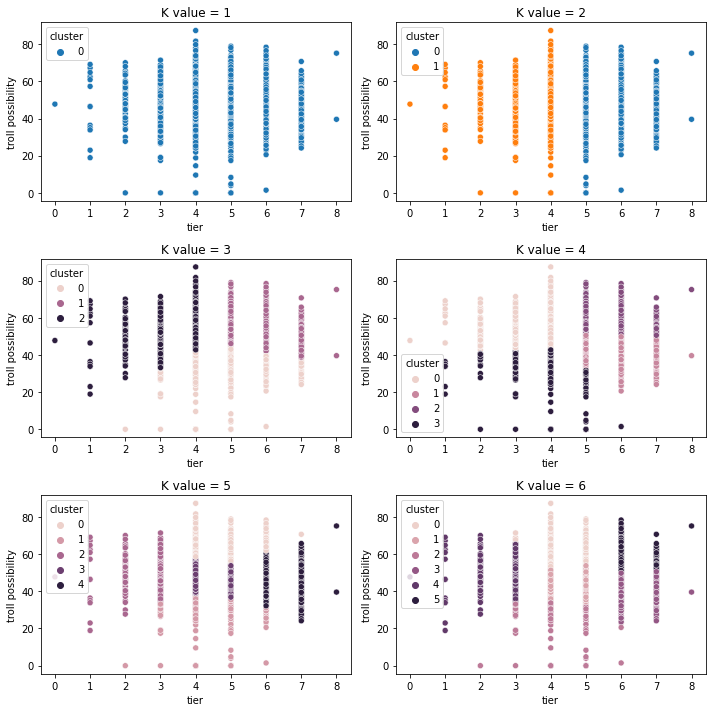

In [57]:
plt.figure(figsize=(10,10))

# iterate them to test K values 
for i in range(1,7):
    # create cluster
    model = KMeans(n_clusters = i)
    # model.fit(tiers)
    df_dop_row['cluster'] = model.fit_predict(processed_data[['tier', 'troll_possibility']])
    # ids = model.fit_predict(tiers[['tier', 'trollposibility']])

    # add a subplot with 2 rows and 3 columns (index = i)
    plt.subplot(3,2,i)
    sns.scatterplot(data=df_dop_row, x='tier',y='troll_possibility',hue='cluster')
    plt.tight_layout()
    
    # labeling the subplot
    plt.title("K value = {}".format(i))
    plt.xlabel('tier')
    plt.ylabel('troll possibility')
    # plt.scatter(processed_data['tier'],processed_data['trollposibility'])
    # plot the scatters

    
    joblib.dump(model,'./kmeans_model'+str(i)+'.pkl')

    display(model.predict(processed_data[['tier','troll_possibility']].head(1)))

# show the figure
plt.show()

In [15]:
display(df)

,lolName,tier,trollposibility,index,cluster
0,낭만초밥,1,23.1,0,3
1,은하찡검듀,1,42.3,1,3
2,zi존성상혁,1,11.0,2,3
3,덩킨덧니,1,25.1,3,3
4,이승원0,1,26.0,4,3
...,...,...,...,...,...
95,푸우는꿀을먹긴해,6,1.0,95,4
96,scgod69,7,29.8,96,4
97,6fanny,8,95.3,97,5
98,하이네네,0,98.0,98,5


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45229 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47564 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48165 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51008 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_

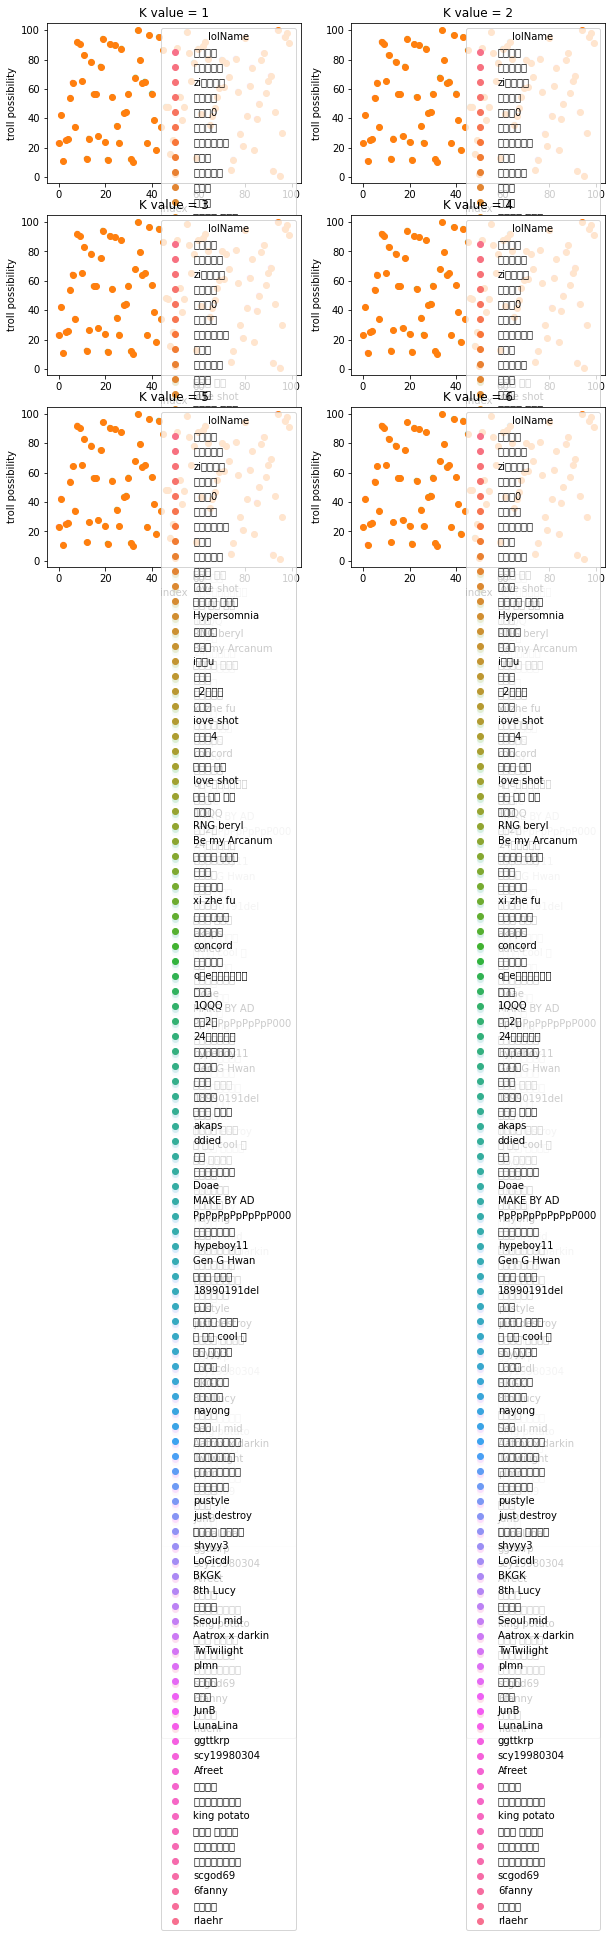

In [14]:
plt.figure(figsize=(10,10))

# iterate them to test K values 
for i in range(1,7):
    # create cluster
    model = KMeans(n_clusters = i)
    # model.fit(name.index)
    df['cluster'] = model.fit_predict(df[['index', 'trollposibility']])
    # ids = model.fit_predict(tiers[['tier', 'trollposibility']])

    # add a subplot with 2 rows and 3 columns (index = i)
    plt.subplot(3,2,i)
    sns.scatterplot(data=df, x='index',y='trollposibility',hue='lolName')
    plt.tight_layout()
    
    # labeling the subplot
    plt.title("K value = {}".format(i))
    plt.xlabel('index')
    plt.ylabel('troll possibility')
    plt.scatter(df['index'],df['trollposibility'])
    # plot the scatters

    
    joblib.dump(model,'./kmeans_model_name'+str(i)+'.pkl')

    

# show the figure
plt.show()

In [ ]:
# K = 3으로 클러스터링
model = KMeans(n_clusters = 3)

# 클러스터링 생성
cluster_ids = model.fit_predict(tiers[['tier', 'trollposibility']])

# create a scatter plot
plt.scatter(processed_data['tier'], processed_data['trollposibility'], c=cluster_ids)

# 제품과 클러스터 id로 데이터에 범례 달기
for index, c_id, bought, returned, zip_code, product in processed_data.itertuples():
    plt.annotate("Clu{}: {}".format(cluster_ids[index], product),(bought, returned))
    
plt.xlabel('ItemsBought')
plt.ylabel('ItemsReturned')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


array([4], dtype=int32)

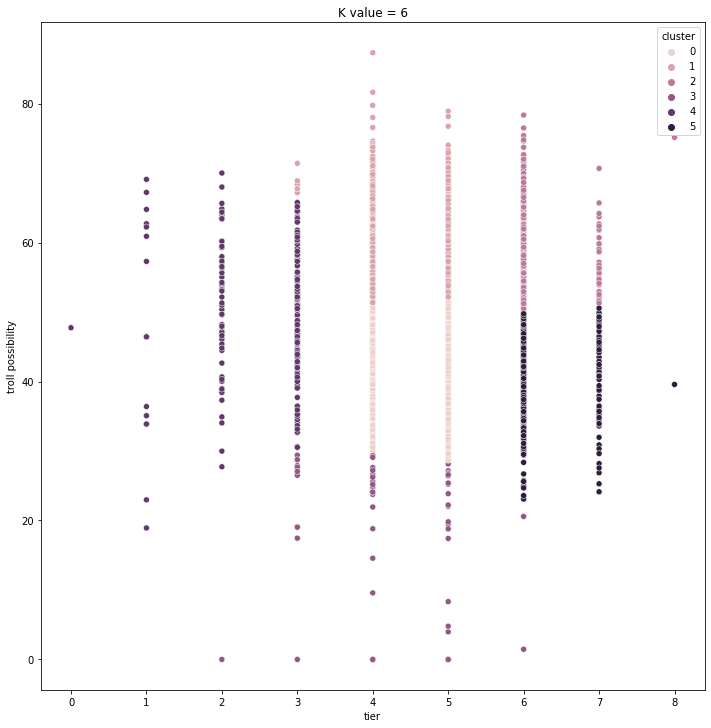

In [59]:
plt.figure(figsize=(10,10))

# iterate them to test K values 
# create cluster
model = KMeans(n_clusters = 6)
# model.fit(tiers)
df_dop_row['cluster'] = model.fit_predict(processed_data[['tier', 'troll_possibility']])
# ids = model.fit_predict(tiers[['tier', 'trollposibility']])

# add a subplot with 2 rows and 3 columns (index = i)
sns.scatterplot(data=df_dop_row, x='tier',y='troll_possibility',hue='cluster')
plt.tight_layout()

# labeling the subplot
plt.title("K value = 6")
plt.xlabel('tier')
plt.ylabel('troll possibility')
# plt.scatter(processed_data['tier'],processed_data['trollposibility'])
# plot the scatters


joblib.dump(model,'./kmeans_model.pkl')

display(model.predict(processed_data[['tier','troll_possibility']].head(1)))

# show the figure
plt.show()